In [ ]:
# In this notebook I will train a model to predict the job category from the job title based on my data_science_jobs dataset.
# This is a supervised learning task
# In the summary of my dataset I saw that I had 15 unique job titles. Since the Data Science job market evolved with the years I will do an excel based on 
# LinkedIn job titles and categories.

In [4]:
# read CSV file
import csv 
import pandas as pd
df = pd.read_csv('data_science_job.csv')

print(df['job_category'].nunique())
print(df['job_category'].value_counts())

# there are 4 unique job categories: Data Science, ML/AI, Analysis, Engineering

4
job_category
Data Science    1173
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64


In [5]:
# preprocess the data
df['job_title'] = df['job_title'].str.lower().str.strip()
df['job_category'] = df['job_category'].str.lower().str.strip()



In [6]:
## I realised it is important to remove NA's as they may affect the prediction.
df['job_category'].isna().sum()
df = df.dropna()



In [7]:
df.head(10)
df.shape
#print(df['job_category'].value_counts())

(4500, 12)

In [8]:
df_jobs = df.copy()  
df_jobs['job_category'] = df_jobs['job_category'].str.replace('ml/ai', 'machine learning/ artificial intelligence')

In [169]:
df_jobs.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine learning engineer in office,analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,statistician (remote),machine learning/ artificial intelligence,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,machine learning engineer,machine learning/ artificial intelligence,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,data analyst in office,machine learning/ artificial intelligence,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,statistician,data science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
5,2020,machine learning engineer,engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,data analyst in office,data science,JPY,178404,105324,DE,EX,PT,Remote,DE,L
7,2021,data scientist (remote),machine learning/ artificial intelligence,JPY,187908,90706,UK,EX,CT,Remote,JP,M
9,2022,statistician (remote),engineering,us dolars,31694,73408,DE,EN,CT,Remote,US,S
10,2022,data engineer in office,data science,us dolars,157727,167559,US,SE,FL,Hybrid,US,S


In [9]:
# the new dataset to test on
import csv 
import pandas as pd
df_linkedin = pd.read_csv("linkedin_job.csv", sep=';')


In [10]:
df_linkedin.describe()

,job_title,job_category
count,87,87
unique,83,4
top,data engineer,data science
freq,3,29


In [11]:
df_linkedin.head(20)
print(df_linkedin['job_category'].value_counts())

job_category
data science                                 29
analysis                                     27
engineering                                  19
machine learning/ artificial intelligence    12
Name: count, dtype: int64


In [12]:
# TF-IDF Vectorization and prepare the train and test set
from sklearn.feature_extraction.text import TfidfVectorizer

# job_title is free input text
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df_jobs['job_title'])
y_train = (df_jobs['job_category'])
X_test = vectorizer.transform(df_linkedin['job_title'])
y_test = (df_linkedin['job_category'])


In [13]:
# train a classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

C:\Users\diana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [14]:
# Predict on linkedin data
predictions = model.predict(X_test)
df_linkedin['predicted_job_category'] = predictions


In [11]:
print(df_linkedin[['job_title', 'job_category', 'predicted_job_category']].head(10))

                             job_title  job_category predicted_job_category
0                         data analyst  data science           data science
1                junior data scientist  data science               analysis
2        logistics data analyst intern      analysis           data science
3                     business analyst      analysis           data science
4                 junior power analyst      analysis           data science
5             digital analytics intern      analysis               analysis
6                       data scientist  data science               analysis
7                  data science intern  data science           data science
8              data engineering intern   engineering           data science
9  junior business intelligence intern      analysis               analysis


In [15]:
# let's calculate the accuracy score on my linkedin dataset
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(df_linkedin['job_category'], df_linkedin['predicted_job_category'])
print(f"Accuracy on LinkedIn dataset: {accuracy:.4f}")

Accuracy on LinkedIn dataset: 0.2759


In [16]:
print("Classification Report:")
print(classification_report(df_linkedin['job_category'], df_linkedin['predicted_job_category'], zero_division=0))

# the accuracy is very low: 27.59 %
# I see that the logistic regression fails to predict the job categories. May be the classes are imbalanced and it struggles with non-linear 
# boundaries
# the best predicitve class is data science and the model completely misses engineering jobs. I have to try other classifiers.

Classification Report:
                                           precision    recall  f1-score   support

                                 analysis       0.21      0.26      0.23        27
                             data science       0.37      0.52      0.43        29
                              engineering       0.00      0.00      0.00        19
machine learning/ artificial intelligence       0.17      0.17      0.17        12

                                 accuracy                           0.28        87
                                macro avg       0.18      0.24      0.21        87
                             weighted avg       0.21      0.28      0.24        87



In [17]:
# Now I want to try some other alternative models to test if the accuracy and prediction score increases.
# I will create a for loop. Instead of executing each model individually, I can create a list of classifiers.

# Data cleaning is already done. Let's get started with the vectorization and label encoding
from sklearn.preprocessing import LabelEncoder # improv = improvement
# Vectorize job titles 
vectorizer = TfidfVectorizer(stop_words='english')
X_train_improv = vectorizer.fit_transform(df_jobs['job_title'])
X_test_improv = vectorizer.transform(df_linkedin['job_title'])

# Encode target labels, job_category is a label, so it's categorial text
y_train_improv = df_jobs['job_category']
y_test_improv = df_linkedin['job_category']

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_improv)
y_test_enc = label_encoder.transform(y_test_improv)

In [18]:
# For the improvement step I chose MultinomialNB,RandomForest and DecisionTree.
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



classifiers = {
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=42)
}


In [19]:
# Train and predict the job categories on df_linkedin
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_improv, y_train_enc)
    y_pred = clf.predict(X_test_improv)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    df_linkedin[f'predicted_{name}'] = y_pred_labels
    acc = accuracy_score(y_test_enc, y_pred)
    report = classification_report(y_test_enc, y_pred, zero_division=0, target_names=label_encoder.classes_, output_dict=False)
    results[name] = (acc, report)

In [20]:
# Check the results
for name, (acc, report) in results.items():
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report)

# the accuracy for MultinomialNB increases to 34.48% 
# the accuracy for RandomForest indicated 35.63%
# decision tree with the highest score 37.93% 


Classifier: MultinomialNB
Accuracy: 0.3448
Classification Report:
                                           precision    recall  f1-score   support

                                 analysis       0.00      0.00      0.00        27
                             data science       0.39      0.97      0.55        29
                              engineering       0.00      0.00      0.00        19
machine learning/ artificial intelligence       0.17      0.17      0.17        12

                                 accuracy                           0.34        87
                                macro avg       0.14      0.28      0.18        87
                             weighted avg       0.15      0.34      0.21        87


Classifier: RandomForest
Accuracy: 0.3563
Classification Report:
                                           precision    recall  f1-score   support

                                 analysis       0.23      0.26      0.24        27
                             data

In [21]:
# insepect predictions
print("\nSample Predictions:")
#print(df_linkedin[["job_title", "job_category", "predicted_MultinomialNB", "predicted_RandomForest", "predicted_DecisionTree"]].head(10))

df_linkedin[["job_title", "job_category", "predicted_MultinomialNB", "predicted_RandomForest", "predicted_DecisionTree"]].head(10).style.background_gradient(cmap='coolwarm')




Sample Predictions:


,job_title,job_category,predicted_MultinomialNB,predicted_RandomForest,predicted_DecisionTree
0,data analyst,data science,data science,data science,data science
1,junior data scientist,data science,data science,data science,data science
2,logistics data analyst intern,analysis,data science,data science,data science
3,business analyst,analysis,data science,data science,analysis
4,junior power analyst,analysis,data science,data science,analysis
5,digital analytics intern,analysis,data science,analysis,analysis
6,data scientist,data science,data science,data science,data science
7,data science intern,data science,data science,data science,analysis
8,data engineering intern,engineering,data science,data science,analysis
9,junior business intelligence intern,analysis,data science,analysis,analysis


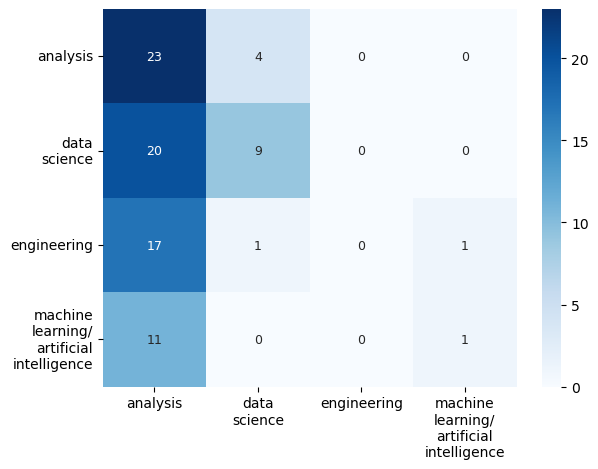

In [35]:
# since decisiontree had the highest score I will visualize this one in a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

name = "DecisionTree"
clf = classifiers[name]

y_pred = clf.predict(X_test_improv)
cm = confusion_matrix(y_test_enc, y_pred)

# Plot
xticklabels = [label.replace(" ", "\n") for label in label_encoder.classes_]
yticklabels = [label.replace(" ", "\n") for label in label_encoder.classes_]

plt.figure()
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=xticklabels,
                 yticklabels=yticklabels,
                 annot_kws={"size": 9})

# Adjust tick size
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout()
#plt.xticks(fontsize=12, rotation=45)
#plt.yticks(fontsize=12, rotation=0)
#plt.xlabel('Predicted', size= 12)
#plt.ylabel('True', size=12)
#plt.title('Confusion Matrix - DecisionTree', size=14)
plt.savefig('CM_DecisionTree_new.png')
plt.show()



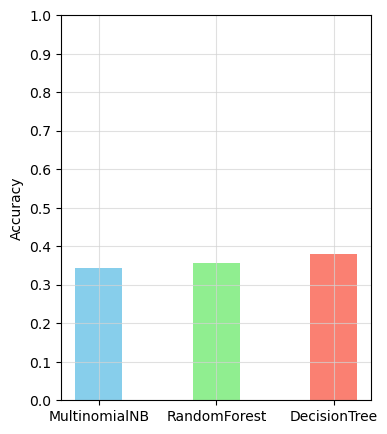

In [22]:
# bar chart of the accuracy score of all models
names = list(results.keys())
accuracies = [results[name][0] for name in names]
import numpy as np

plt.figure(figsize=(4,5))
plt.bar(names, accuracies, color=['skyblue', 'lightgreen', 'salmon'],  width=0.4)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.ylabel('Accuracy')
#plt.title('Model Accuracy Comparison', size=13)
plt.grid(axis='both', linestyle='-', alpha=0.7, color='lightgrey')
plt.savefig('Model_accuracy_comparison.png')

plt.show()

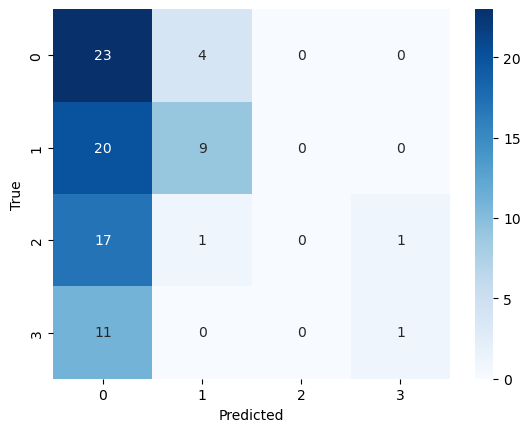

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion Matrix.png')

#plt.title('Confusion Matrix')
plt.show()




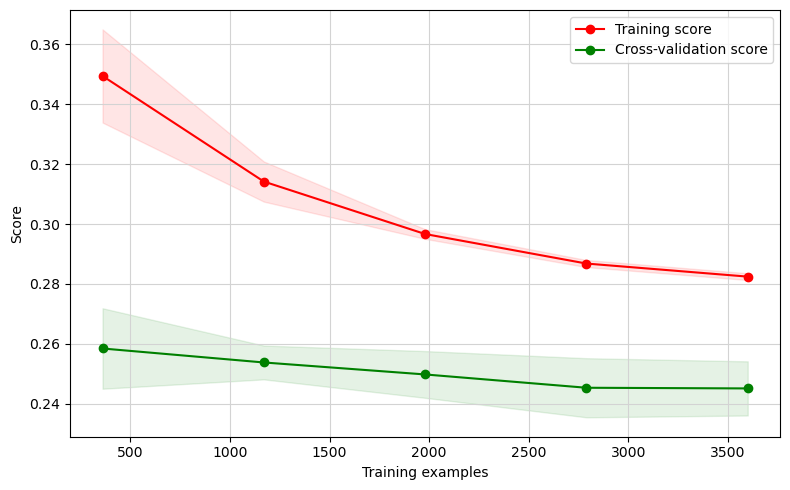

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np

estimator = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train_improv, y_train_enc,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)  # calculate mean and standard deviation
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
#plt.title("Decision Tree Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid(True, color='#d3d3d3')

# Training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Cross-validation scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.savefig('DecisionTree_learning_curve.png')

plt.show()


# cross-validation score stays through all the data entries the same which indicate that the model is not able to learn enough good patterns
# in an ideal setting this curve would normaly go up as the data increases and patterns are better recognizable